### Generalized Linear Models

Consider a scenario where the outcome is binary (e.g., success/failure, yes/no). 
Linear regression may predict values outside the range [0,1], which doesn't make sense for probabilities.

## Logistic Regression

# Assignement:

A wireless telecommunications company wants to estimate the probability that a customer will churn
(switch to a diﬀerent company) in the next six months. With a reasonably accurate prediction of a person’s
likelihood of churning, the sales and marketing groups can attempt to retain the customer by oﬀering
various incentives. Data on 8,000 current and prior customers was obtained. The variables collected for
each customer follow:

- Age (years)
- Married (true/false)
- Duration as a customer (years)
- Churned_contacts (count)—Number of the customer’s contacts that have churned (count)
- Churned (true/false)—Whether the customer churned

- visualize and summaries statistics in your EDA process to examine the distributions, relationships, and potential outliers within the dataset.
- conduct an exploratory data analysis (EDA) of the provided dataset to gain insights into the relationships between the variables and the likelihood of churn.
- Based on the nature of the dependent variable (churned or not churned) and the characteristics of the independent variables, how would you apply a Generalized Linear Model (GLM) to estimate the probability of churn?
- When selecting a distribution for the GLM, what factors from the dataset would you consider to determine the appropriate distribution to fit? Could you demonstrate how to assess and choose the distribution using code?
- How would you evaluate whether the assumptions of the selected distribution hold true for the dataset?  provide code demonstrating the evaluation process.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
data = pd.read_csv('https://raw.githubusercontent.com/evinhas/EMCDSA_code_data/master/Chapter%206/churn.csv')
data

,ID,Churned,Age,Married,Cust_years,Churned_contacts
0,1,0,61,1,3,1
1,2,0,50,1,3,2
2,3,0,47,1,2,0
3,4,0,50,1,3,3
4,5,0,29,1,1,3
...,...,...,...,...,...,...
7995,7996,1,40,1,3,5
7996,7997,0,25,1,3,5
7997,7998,0,60,1,3,6
7998,7999,1,38,1,7,6


### Preprocessing:

In [3]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   ID                8000 non-null   int64
 1   Churned           8000 non-null   int64
 2   Age               8000 non-null   int64
 3   Married           8000 non-null   int64
 4   Cust_years        8000 non-null   int64
 5   Churned_contacts  8000 non-null   int64
dtypes: int64(6)
memory usage: 375.1 KB
None


In [4]:
data.isnull().sum()


ID                  0
Churned             0
Age                 0
Married             0
Cust_years          0
Churned_contacts    0
dtype: int64

In [5]:
# Convert 'Married' to a categorical type if it's not already
data['Married'] = data['Married'].astype('category')


In [6]:
data.head()

,ID,Churned,Age,Married,Cust_years,Churned_contacts
0,1,0,61,1,3,1
1,2,0,50,1,3,2
2,3,0,47,1,2,0
3,4,0,50,1,3,3
4,5,0,29,1,1,3


In [7]:
### complete the code

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   ID                8000 non-null   int64   
 1   Churned           8000 non-null   int64   
 2   Age               8000 non-null   int64   
 3   Married           8000 non-null   category
 4   Cust_years        8000 non-null   int64   
 5   Churned_contacts  8000 non-null   int64   
dtypes: category(1), int64(5)
memory usage: 320.6 KB


In [9]:
#age of costumers
data['Age'].describe()

count    8000.000000
mean       41.405125
std        13.621745
min        18.000000
25%        30.000000
50%        41.000000
75%        53.000000
max        65.000000
Name: Age, dtype: float64

In [10]:
data['Cust_years'].describe()

count    8000.000000
mean        3.163625
std         1.114117
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        10.000000
Name: Cust_years, dtype: float64

In [32]:
#how 
data['Married'].value_counts(normalize=True) * 100

Married
1    50.0375
0    49.9625
Name: proportion, dtype: float64

In [12]:
data['Churned'].value_counts()

Churned
0    6257
1    1743
Name: count, dtype: int64

In [13]:
#describing the churned costumers features
data[data['Churned'] == 1].describe()

#we can see that the mean age of cutumers who churned is 27 which are the yong population of the data

,ID,Churned,Age,Cust_years,Churned_contacts
count,1743.000000,1743.0,1743.000000,1743.000000,1743.000000
mean,4159.695927,1.0,27.525531,3.163511,2.017212
std,2356.626873,0.0,7.798798,1.102236,1.404332
min,13.000000,1.0,18.000000,1.000000,0.000000
25%,2184.000000,1.0,21.000000,2.000000,1.000000
50%,4122.000000,1.0,26.000000,3.000000,2.000000
75%,6211.500000,1.0,31.000000,4.000000,3.000000
max,7999.000000,1.0,63.000000,9.000000,6.000000


In [14]:
#describing the non churned costumers features
data[data['Churned'] == 0].describe()

,ID,Churned,Age,Cust_years,Churned_contacts
count,6257.000000,6257.0,6257.000000,6257.000000,6257.000000
mean,3956.153109,0.0,45.271536,3.163657,1.634010
std,2294.482808,0.0,12.316204,1.117492,1.217932
min,1.000000,0.0,18.000000,1.000000,0.000000
25%,1962.000000,0.0,36.000000,2.000000,1.000000
50%,3963.000000,0.0,46.000000,3.000000,2.000000
75%,5936.000000,0.0,56.000000,4.000000,2.000000
max,8000.000000,0.0,65.000000,10.000000,6.000000


In [61]:
# Compute point-biserial correlation coefficient
pb_corr_age, _ = stats.pointbiserialr(data['Churned'], data['Age'])
print("Age and churned:", pb_corr_age)

#with a correlation coefficient of -0.53, we can assume that the relationship 
#between churned or not and age of costumer is negativly corelated
#iow, as the age of our costumers increase the likelyhood of them churning decrease

Age and churned: -0.537819791942407


In [43]:
#T-Test
age_churned = data[data['Churned'] == 1]['Age']
age_not_churned = data[data['Churned'] == 0]['Age']

# Perform independent samples t-test
t_statistic, p_value = stats.ttest_ind(age_churned, age_not_churned)

print("T-statistic:", t_statistic)
print("P-value:", p_value) 

#very low p-value < 0.05  indicate that there is a significant difrence in mean
#between the tow groups that is not duo to chance

T-statistic: -57.051765094148394
P-value: 0.0


In [27]:
contact_churned = data[data['Churned'] == 1]['Churned_contacts']
contactn_ot_churned = data[data['Churned'] == 0]['Churned_contacts']

# Perform independent samples t-test
t_statistic, p_value = stats.ttest_ind(contact_churned, contactn_ot_churned)

print("T-statistic:", t_statistic)
print("P-value:", p_value)

#very low p-value < 0.05 indicate that there is a significant difrence in mean
#between the tow groups that is not duo to chance

T-statistic: 11.221232831290864
P-value: 5.279195778071481e-29


In [30]:
gcust_churned = data[data['Churned'] == 1]['Cust_years']
cust_ot_churned = data[data['Churned'] == 0]['Cust_years']

# Perform independent samples t-test
t_statistic, p_value = stats.ttest_ind(cust_churned, cust_ot_churned)

print("T-statistic:", t_statistic)

#the very high p-value > 0.05 indicate that there is no significant difrence in mean
#between the tow groups 

T-statistic: -0.0048221659945405166
P-value: 0.9961526033795209


In [73]:
crosstab = pd.crosstab(data['Married'], data['Churned'])
print(crosstab)
chi2, p, _, _ = stats.chi2_contingency(crosstab)
print("Chi-square statistic:", chi2)
print("P-value:", p)

#high p-value indicate  the value of one variable
#does not give information about the other variable
#no relationship between the variables (i.e.,
#the variables are independent): the value of one variable
#does not give information about the other variable

Churned     0    1
Married           
0        3128  869
1        3129  874
Chi-square statistic: 0.005318862438413589
P-value: 0.9418613979311348


In [75]:
#GLM
import statsmodels.formula.api as smf

formula = 'Churned ~ Age + Churned_contacts'
model = smf.glm(formula=formula, data=data, family=sm.families.Binomial())
res = model.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                Churned   No. Observations:                 8000
Model:                            GLM   Df Residuals:                     7997
Model Family:                Binomial   Df Model:                            2
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2679.6
Date:                Fri, 03 May 2024   Deviance:                       5359.2
Time:                        20:39:06   Pearson chi2:                 8.19e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3151
Covariance Type:            nonrobust                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            3.5027      0.128  

coefficient for Age (-0.1566) indicates the effect of age on the log-odds
of churn holding other variables constant, 
for each one unite increase in age, the log odds of churn decrease 
by 0.1566. this coefficint assume that older costumers are less likely
to churn compared to yonger costumers 
,example if the log odds of churn were 3.5 for a 30 years old costuemr 
they would decrease to 3.34 for a 31 year old costumer assuming other variables remain 
constant

Coefficient for Churned_contacts (0.3819):
This coefficient represents the effect of Churned_contacts on the log-odds of churn, holding other variables constant.
For each one-unit increase in Churned_contacts (e.g., one additional contact who has churned), the log-odds of churn increase by 0.3819.

In [99]:
y_pred = (yhat >= 0.5).astype(int)
data['predicted'] = y_pred

In [100]:
data

,ID,Churned,Age,Married,Cust_years,Churned_contacts,predicted
0,1,0,61,1,3,1,0
1,2,0,50,1,3,2,0
2,3,0,47,1,2,0,0
3,4,0,50,1,3,3,0
4,5,0,29,1,1,3,1
...,...,...,...,...,...,...,...
7995,7996,1,40,1,3,5,0
7996,7997,0,25,1,3,5,1
7997,7998,0,60,1,3,6,0
7998,7999,1,38,1,7,6,0


In [104]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(data['Churned'], data['predicted'])
print("Accuracy in %:", accuracy * 100)

Accuracy in %: 84.15


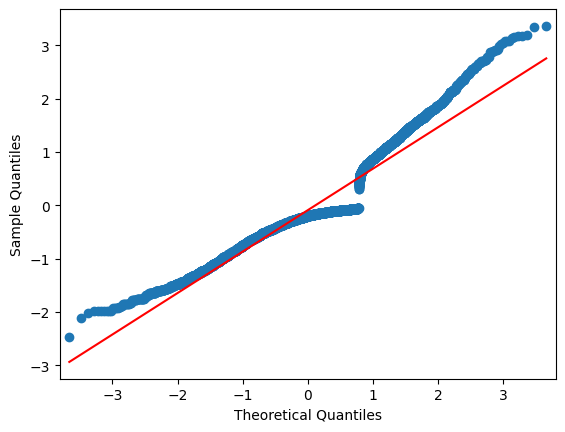

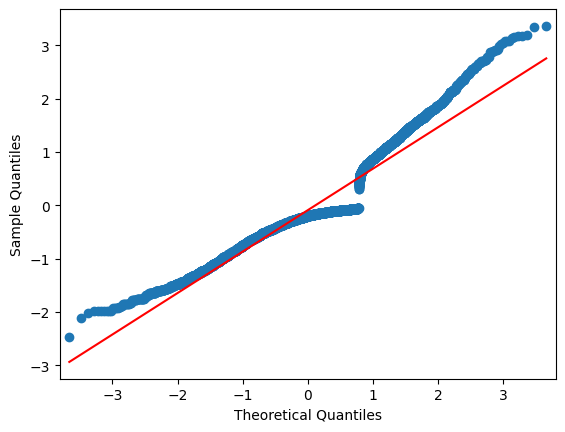

In [105]:
resid = res.resid_deviance.copy()
# QQ Plot of Deviance Residuals:

from statsmodels import graphics
graphics.gofplots.qqplot(resid, line='r')


Text(0.5, 0, 'Fitted values')

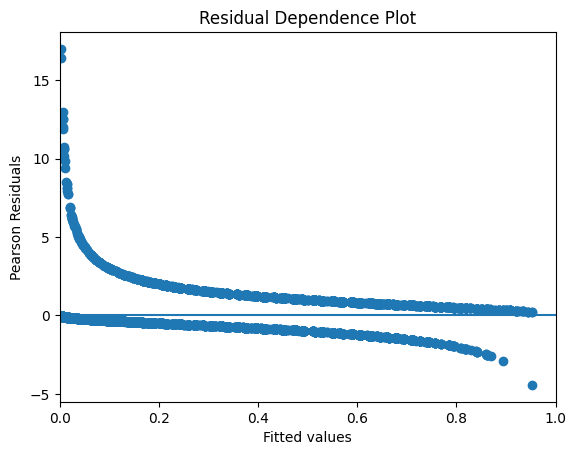

In [106]:
#Plot yhat vs. Pearson residuals:

fig, ax = plt.subplots()

ax.scatter(yhat, res.resid_pearson)
ax.hlines(0, 0, 1)
ax.set_xlim(0, 1)
ax.set_title('Residual Dependence Plot')
ax.set_ylabel('Pearson Residuals')
ax.set_xlabel('Fitted values')



In [114]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

X = data[['Age', 'Churned_contacts']]
y = data['Churned']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a logistic regression model
model = LogisticRegression().fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.845
Precision: 0.6354166666666666
Recall: 0.5613496932515337
F1-score: 0.5960912052117264
